## Problem Statement: Airbnb Hotel Booking Analysis.
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

## QUESTIONS
This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.

1. What are the different property types in the Dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhood group have the highest average prices for Airbnb listings?

4. Is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts by calculated host listing count?

6. Are hosts with verified identities more likely to receive positive reviews?

7. Is there a correlation between the price of a listing and its service fee?

8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

## DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data (1).csv', low_memory = False)

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26101 entries, 0 to 26100
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26101 non-null  int64  
 1   NAME                            26010 non-null  object 
 2   host id                         26100 non-null  float64
 3   host_identity_verified          25982 non-null  object 
 4   host name                       26013 non-null  object 
 5   neighbourhood group             26073 non-null  object 
 6   neighbourhood                   26084 non-null  object 
 7   lat                             26092 non-null  float64
 8   long                            26092 non-null  float64
 9   country                         26013 non-null  object 
 10  country code                    26021 non-null  object 
 11  instant_bookable                26021 non-null  object 
 12  cancellation_policy             

In [9]:
df.duplicated().value_counts()

,count
False,26101


In [10]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",2.680241e+10,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


# Problems Identified within the Data



*   541 duplicated Records were found in the Data
*   Insufficient information were recorded for the house_rules and Licence columns


*   Dollar signs and commas recorded along with the values for price and service fee.

*  Missing values in some records

*   Columns like the price, service fee, host id, last review, Construction year are assigned wrong datatypes.

*   In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.


*   Some outliers were identified in the availabilty 365 column








In [11]:
df.drop_duplicates(inplace = True)

df.drop(['house_rules', 'license'], axis=1, errors='ignore', inplace=True)


df['price'] = df['price'].str.replace('$','', regex = False)
df['service fee'] = df['service fee'].str.replace('$','', regex = False)
df['price'] = df['price'].str.replace(',','', regex = False)
df['service fee'] = df['service fee'].str.replace(',','', regex = False)

df.rename(columns={
    'price': 'price_$',
    'service fee': 'service fee_$'
},inplace=True)

df.dropna(inplace=True)

df['price_$'] = df['price_$'].astype(float)
df['service fee_$'] = df['service fee_$'].astype(float)
df['id'] = df['id'].astype(int)
df['host id'] = df['host id'].astype(int)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

df = df.drop(df[df['availability 365']>500].index)

/tmp/ipython-input-28958373.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [12]:
df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1        False
4        False
5        False
7        False
         ...  
26094    False
26095    False
26096    False
26098    False
26099    False
Length: 20856, dtype: bool>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20856 entries, 0 to 26099
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20856 non-null  int64         
 1   NAME                            20856 non-null  object        
 2   host id                         20856 non-null  int64         
 3   host_identity_verified          20856 non-null  object        
 4   host name                       20856 non-null  object        
 5   neighbourhood group             20856 non-null  object        
 6   neighbourhood                   20856 non-null  object        
 7   lat                             20856 non-null  float64       
 8   long                            20856 non-null  float64       
 9   country                         20856 non-null  object        
 10  country code                    20856 non-null  object        
 11  instant

# Summary Statistics

In [14]:
df.describe()

,id,host id,lat,long,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,2.085600e+04,2.085600e+04,20856.000000,20856.000000,20856.000000,20856.000000,20856.000000,20856.000000,20856.000000,20856,20856.000000,20856.000000,20856.000000,20856.000000
mean,8.247038e+06,4.930647e+10,40.728745,-73.954317,2012.497794,621.662351,124.335203,6.850307,39.647056,2018-05-13 07:35:08.630609664,0.986590,3.030159,3.270905,168.782413
min,1.001254e+06,1.303496e+08,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,4.539232e+06,2.444868e+10,40.688410,-73.982332,2008.000000,332.000000,66.000000,2.000000,4.000000,2017-06-11 00:00:00,0.110000,2.000000,1.000000,36.000000
50%,8.234533e+06,4.918272e+10,40.722085,-73.956320,2012.000000,617.000000,123.000000,3.000000,14.000000,2019-01-02 00:00:00,0.380000,3.000000,1.000000,157.000000
75%,1.189338e+07,7.403388e+10,40.763933,-73.939520,2018.000000,911.000000,182.000000,5.000000,54.000000,2019-06-17 00:00:00,1.370000,4.000000,2.000000,289.000000
max,1.541581e+07,9.875746e+10,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,16.220000,5.000000,121.000000,426.000000
std,4.167111e+06,2.853616e+10,0.054330,0.041765,5.768797,333.679833,66.740181,21.056450,57.790405,NaN,1.348973,1.410174,10.589214,135.519078


# What are the different property types in the DataSet?

In [15]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,11374
Private room,9170
Shared room,312


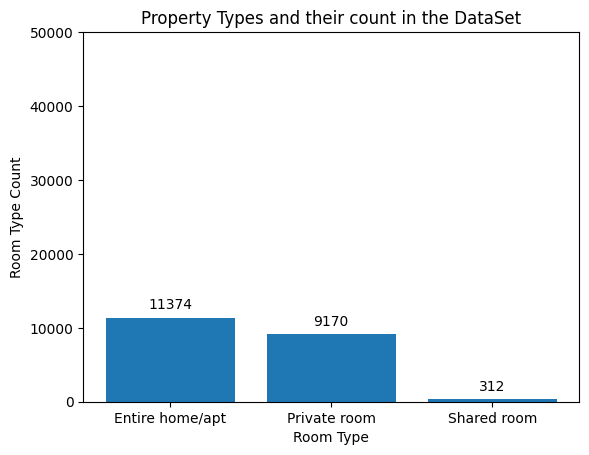

In [16]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels =  property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the DataSet');

The Airbnb open dataset reveals four distinct property or room types. These categories comprimise;


*   Entire home/apt
*   Private room


*   Shared room
*   Hotel room
Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurences , followed by Private room with 37,494





## Which neighbourhood group has the highest number of listings?


In [17]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,9203
Brooklyn,9118
Queens,2034
Bronx,367
Staten Island,134


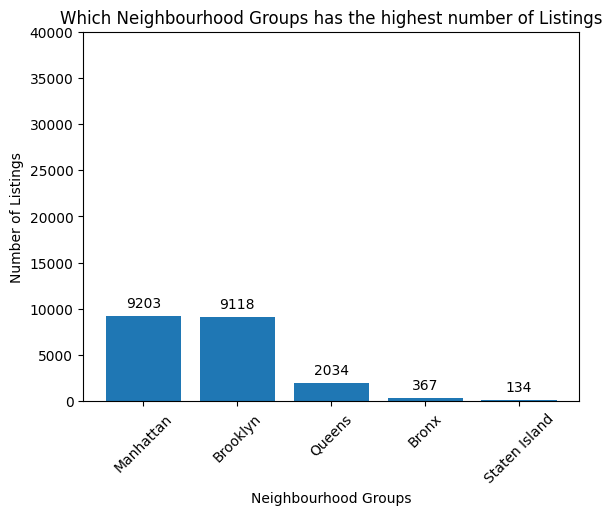

In [18]:
#which neighbourhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels =  hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighbourhood Groups has the highest number of Listings');

The dataset contains five different neighbourhood groups, namely brooklyn, Manhattan, Queens, Bronx, and Staten Island . According to the barchart, Brroklyn has the highest number of listings with 34636, followed closely by Manhattan with 34566.

## Which neighbourhoods group have the highest average prices for Airbnb listings?

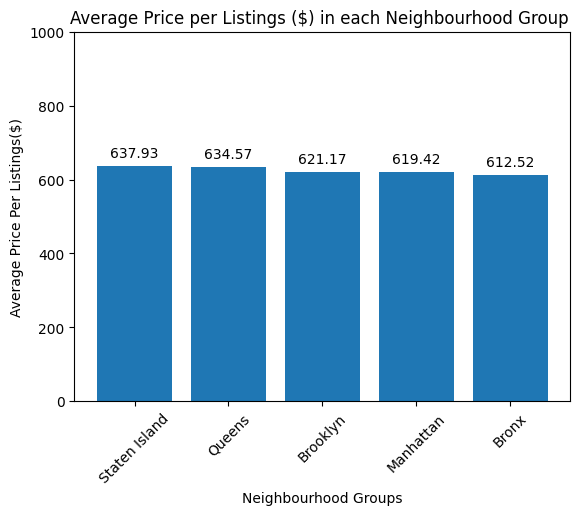

In [19]:
#Which neighbourhood group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, "price_$"], 2), label_type='edge', padding=4)
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average Price Per Listings($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings ($) in each Neighbourhood Group ');
plt.ylim([0,1000]);

Among the five identified neighbourhood  groups in the dataset, Queens boasts the highest average listing price at 630.46 USD, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

## Is there a relationship between the construction year of property and price?

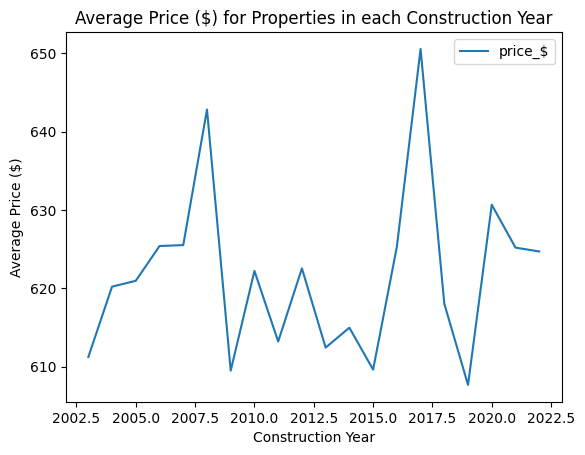

In [20]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progesses.

## Who are the top 10 hosts by calculated host listing count?

### From the numerous hosts in the dataset,we will see the 10 hosts with the highest calculated host count.

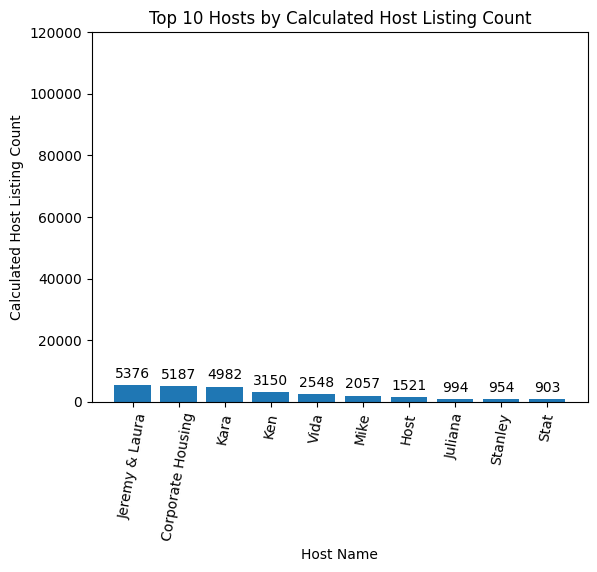

In [21]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, label =  hosts.loc[:,"calculated host listings count"],label_type = 'edge',padding=3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listing Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listing Count');


### The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder(NYC) notably leading with 111,921 listings. Subsequently, the other hosts follow in descending order.

## Are hosts with verified identities more likely to receive positive reviews?

In [22]:
#Are hosts with verified identities more likely to recieve positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.040301
unconfirmed,3.020126


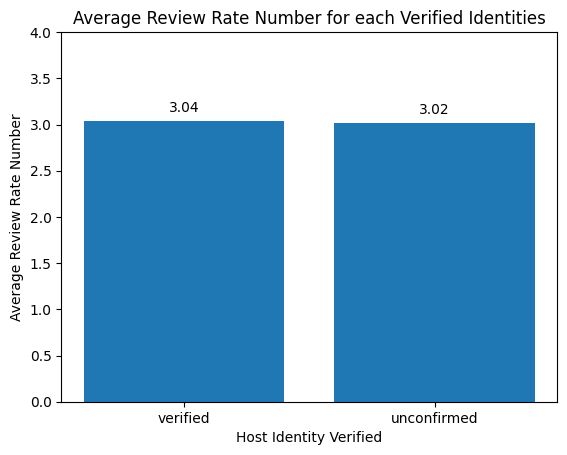

In [23]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2),  padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Identity Verified');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Verified Identities');

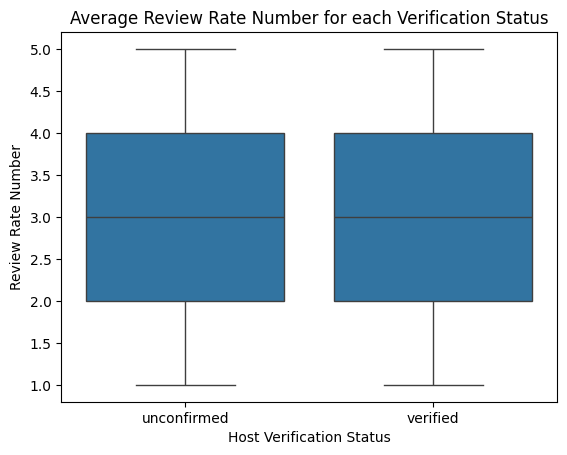

In [24]:
base_color= sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate Number for each Verification Status');

## The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to recieve positive reviews compared to unconfirmed hosts.

# Is there a correlation between the price of a listing and its service fee?

In [28]:
df['price_$'].corr(df['service fee_$'])

np.float64(0.9999910343539924)

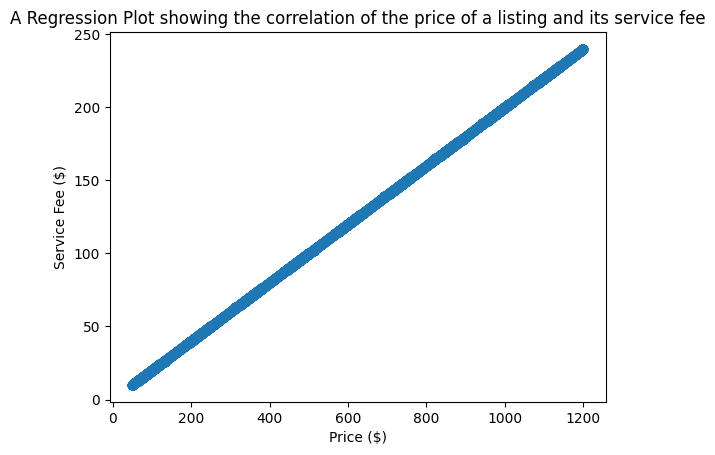

In [29]:
sns.regplot(df,x='price_$',y='service fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the correlation of the price of a listing and its service fee');

The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each forms a rising diagnol line towards the right, signifying that as the price of a property increases, so does its service fee.

## What is the average review rate number(e.g.stars) for listings, and does it vary based in the neighbourhood group and room type?

In [30]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.149606
                    Private room               3.017544
                    Shared room                2.833333
Brooklyn            Entire home/apt            2.987866
                    Private room               3.057542
                    Shared room                3.026087
Manhattan           Entire home/apt            3.025981
                    Private room               3.053736
                    Shared room                3.007042
Queens              Entire home/apt            3.029304
                    Private room               3.028157
                    Shared room                3.209302
Staten Island       Entire home/apt            3.014925
                    Private room               3.298507

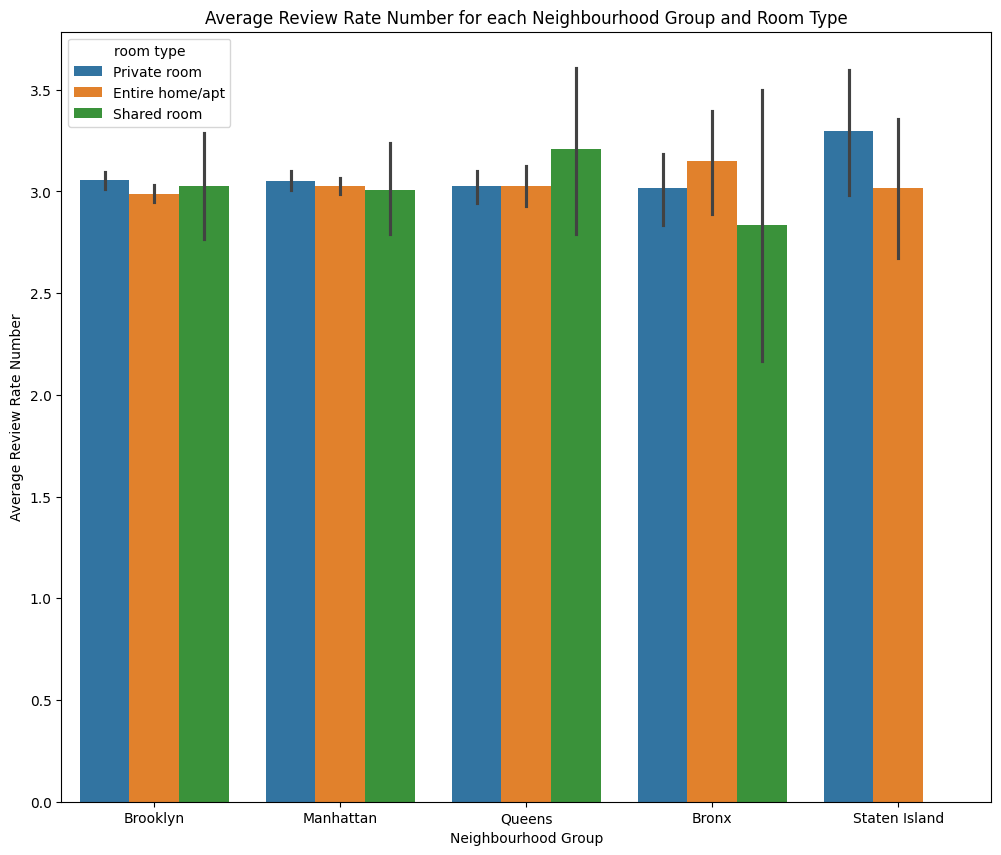

In [31]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Neighbourhood Group and Room Type');

Hotel rooms exhibit has higher review compared to all other property types within the three neighbourhood groups where they are located Brooklyn , Manhattan, and Queens.

## Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

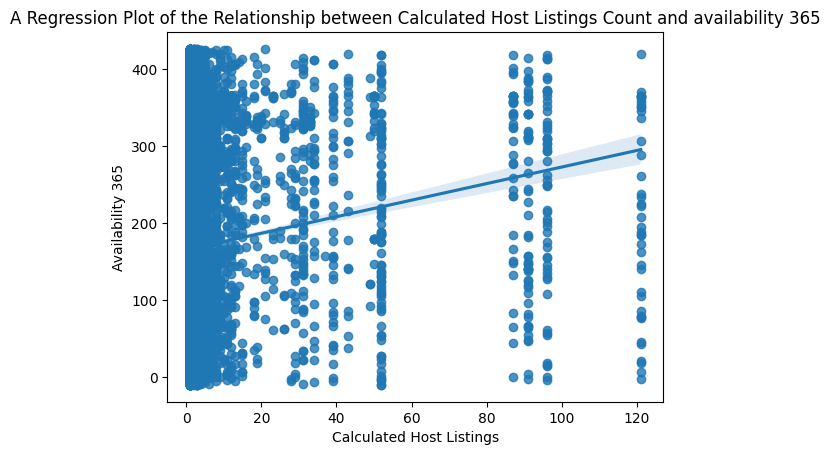

In [32]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and availability 365');

In [34]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.08399801940655222)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

# Conclusion


In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.